# GAC Test Technique
##### Vincent Bardonnet

* ## Exercice 1

In [1]:
# Exercice 1
import pandas as pd #on va utiliser des dataframes pour mieux représenter les données
import numpy as np
import re
# Exercice 2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np

In [2]:
agenda = ['5','2 08:39-10:08','2 08:12-09:48','2 11:09-11:48','2 12:49-13:48','1 13:09-16:27','4 15:18-15:23','3 14:05-17:51']
liste_jour = [1,2,3,4,5]

tom = lambda H,M : H*60+M
map_int = lambda lst: list(map(int,lst))

# [debut_indispo,fin_indispo] en minutes
creneau = lambda H,M: [tom(H,M) , tom(H,M) + 59] 

# minutes -> hh:mm
tos = lambda M : str(M//60).rjust(2,'0') + ':' + str(M%60).rjust(2,'0')

# split de la liste en entrée au format 'int'
agenda_hole = [map_int(re.findall(r'[0-9]+', agd)) for agd in agenda] 

# liste des plages d'indisponibilité de chaque jour
agenda_hole_time = [[L[0], tom(*L[1:3]), tom(*L[3:5])] for L in agenda_hole if len(L) - 1] 

df = pd.DataFrame(agenda_hole_time, columns=["jour", "deb", "fin"])
df = df.sort_values(by=['jour','deb']).reset_index(drop=True)

print('Dataframe des débuts et fin d\'indisponibilité de chaque jours')
print(df)

# Liste exhaustive* des créneaux possibles pour 1 réunion d'1 heure.
# * : càd qu'il est constitué d'absolument tous les créneaux d'1 heure entre les heures de travail 
#     et en dehors des heures d'indisponibilité.
out = []
for day in liste_jour:
    for hour in range(8,17):
        offset = 0
        while offset <= 60:
            start, end = creneau(hour,offset)
            mask_jour = df['jour'] != day
            mask_debut = (df['deb'] < start) & (df['fin'] < start)
            mask_fin = (df['deb'] > end) & (df['fin'] > end)
            mask = mask_debut | mask_fin | mask_jour
            if mask.all() : out.append('{} {}-{}'.format(day,tos(start),tos(end))) 
            offset += 1
            

Dataframe des débuts et fin d'indisponibilité de chaque jours
   jour  deb   fin
0     1  789   987
1     2  492   588
2     2  519   608
3     2  669   708
4     2  769   828
5     3  845  1071
6     4  918   923


In [3]:
out

['1 08:00-08:59',
 '1 08:01-09:00',
 '1 08:02-09:01',
 '1 08:03-09:02',
 '1 08:04-09:03',
 '1 08:05-09:04',
 '1 08:06-09:05',
 '1 08:07-09:06',
 '1 08:08-09:07',
 '1 08:09-09:08',
 '1 08:10-09:09',
 '1 08:11-09:10',
 '1 08:12-09:11',
 '1 08:13-09:12',
 '1 08:14-09:13',
 '1 08:15-09:14',
 '1 08:16-09:15',
 '1 08:17-09:16',
 '1 08:18-09:17',
 '1 08:19-09:18',
 '1 08:20-09:19',
 '1 08:21-09:20',
 '1 08:22-09:21',
 '1 08:23-09:22',
 '1 08:24-09:23',
 '1 08:25-09:24',
 '1 08:26-09:25',
 '1 08:27-09:26',
 '1 08:28-09:27',
 '1 08:29-09:28',
 '1 08:30-09:29',
 '1 08:31-09:30',
 '1 08:32-09:31',
 '1 08:33-09:32',
 '1 08:34-09:33',
 '1 08:35-09:34',
 '1 08:36-09:35',
 '1 08:37-09:36',
 '1 08:38-09:37',
 '1 08:39-09:38',
 '1 08:40-09:39',
 '1 08:41-09:40',
 '1 08:42-09:41',
 '1 08:43-09:42',
 '1 08:44-09:43',
 '1 08:45-09:44',
 '1 08:46-09:45',
 '1 08:47-09:46',
 '1 08:48-09:47',
 '1 08:49-09:48',
 '1 08:50-09:49',
 '1 08:51-09:50',
 '1 08:52-09:51',
 '1 08:53-09:52',
 '1 08:54-09:53',
 '1 08:55-

In [4]:
print('Le premier créneau pour un meeting d\'1 heure est:\n---------------\n',out[0],'\n---------------')

Le premier créneau pour un meeting d'1 heure est:
---------------
 1 08:00-08:59 
---------------


* # Exercice 2

In [5]:
scalerX =  MinMaxScaler() 
scalerY =  MinMaxScaler() 
FXin = lambda x: scalerX.fit_transform(x.reshape((len(x), 1)))
FYin = lambda y: scalerY.fit_transform(y.reshape((len(y), 1)))
Fout = lambda y: scalerY.inverse_transform(y)

In [6]:
x = np.arange(0, 10, 0.1)
y = np.array([2*np.cos(i)+4 for i in x])

In [13]:
class Brain:
    def __init__(self): 
        # Design du réseau de neuronnes
        self.model = Sequential()
        # self.model.add(Dropout(0.1, input_shape=[1])) #empêcher l'overfitting (drop 10% des inputs)
        self.model.add(Dense(units = 1, activation = 'linear', input_shape=[1])) #1 neuronne en linéaire (du fait du 1D array en entrée)
        self.model.add(Dense(units = 64, activation = 'relu')) #64 neuronnes de type "RELU"
        self.model.add(Dense(units = 64, activation = 'relu')) #64 neuronnes de type "RELU"
        self.model.add(Dense(units = 64, activation = 'relu')) #64 neuronnes de type "RELU"
        self.model.add(Dense(units = 64, activation = 'relu')) #64 neuronnes de type "RELU"
        self.model.add(Dense(units = 1, activation = 'linear')) # de même, on a un 1D array en sortie
        # loss et optimization
        self.model.compile(loss='mse', optimizer='adam',metrics=['mse', 'accuracy'])
    def fit(self, x, y):
        x, y = FXin(x), FYin(y)
        self.model.fit(x, y, epochs=5000, verbose=0) # entraînement 1000 fois
    def predict(self, x):
        x = FXin(x)
        return Fout(self.model.predict(x))
    def accuracy(self,y,predict):
        return mean_absolute_error(y, predict),\
               np.sqrt(mean_squared_error(y, predict))
    def display(self,x_train,y_train,y_test):
        f = plt.figure(figsize=(15,8))
        plt.plot(x_train,y_train, label='Original',marker='o')
        plt.plot(x_train,y_test, label='Prediction',marker='o')
        plt.title('Evolution de y en fonction de x')
        plt.xlabel('Input')
        plt.ylabel('Output')
        f.legend()
    


MAE =  0.020055212152162185
RMSE =  0.02394097146784307


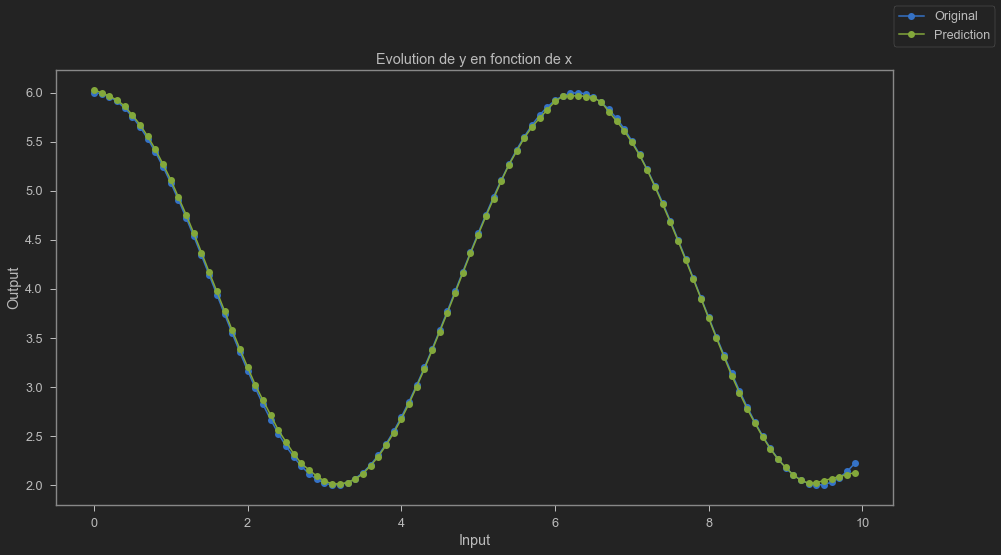

In [14]:
B = Brain()
B.fit(x,y)
prediction = B.predict(x)
mae,rmse = B.accuracy(y,prediction)
print('MAE = ', mae)
print('RMSE = ', rmse)
plot = B.display(x,y,prediction)


In [15]:
x_test = np.arange(0, 20, 0.01)
y_test = np.array([2*np.cos(i)+4 for i in x_test])

MAE =  1.7616417225092837
RMSE =  2.117494809467562


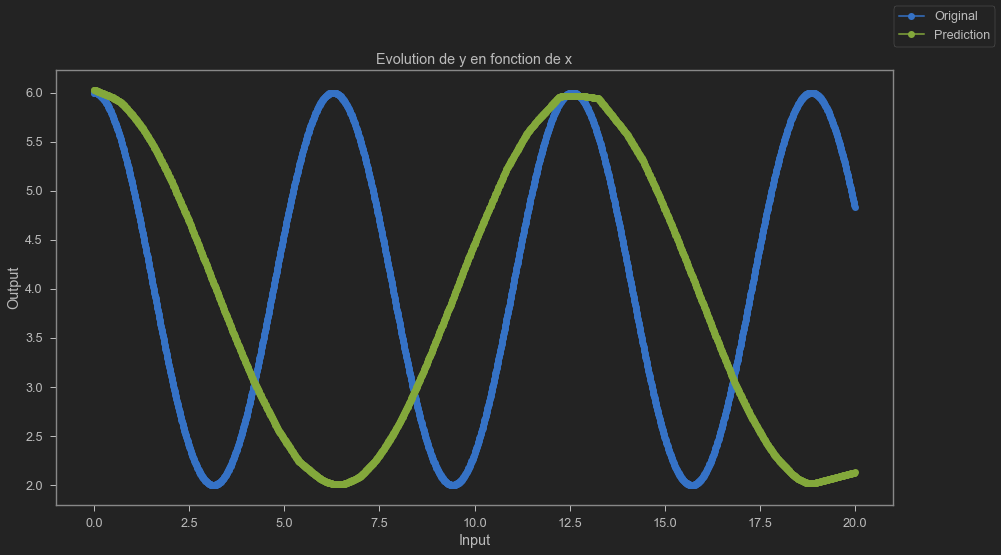

In [16]:
prediction = B.predict(x_test)
mae,rmse = B.accuracy(y_test,prediction)
print('MAE = ', mae)
print('RMSE = ', rmse)
plot = B.display(x_test,y_test,prediction)